# Данные

In [1]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-06-10 04:27:53--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [following]
--2019-06-10 04:27:54--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb19b080110bdf54572c1790616.dl.dropboxusercontent.com/cd/0/inline/AigcXtokpprwg57ctdRVkk-BFtjhll0TGdcYMgxvBecCmQOdz5Wt4pBxdrCDlcEcz9izF3UZvxETtExRZy1IQOxI_Yci-xeP9mTVqAZ0eMNo2A/file# [following]
--2019-06-10 04:27:54--  https://ucb19b080110bdf54572c1790616.dl.dropboxusercontent.com/cd/0/inline/AigcXtokpprwg57ctdRVkk-BFtjhll0TGdcYMgxvBecCmQOdz5Wt4pBxdrCDlcEcz9izF3UZvxETtExRZy1IQOxI_Yci-xeP

In [2]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


# Домашнее задание

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [1 балл]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

Разделите коллекцию текстов на обучающую и тестовую части. 

In [3]:
!pip install pymorphy2[fast]

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = df.dropna()

In [6]:
len(df["text"]) #количество текстов

11526

In [7]:
len(set(df["source"])) #количество классов

4

In [8]:
df["text"].apply(lambda x: len(x.split(' '))).mean() #средняя длина в словах

85.23789692868297

In [9]:
df["text"].str.len().mean() #средняя длина в символах

690.7630574353635

In [0]:
X_train, X_test, y_train, y_test = train_test_split(list(df["text"]), list(df["source"]))

 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

In [11]:
set(df["source"]) #посмотрим на то, какие классы вообще есть и на самые частотные слова по классам

{'mchsgov', 'mil', 'mospolice', 'russianpost'}

In [12]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

nltk.download("stopwords")
stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def tokenize(text):
    return ([word.strip('.,:;?!()""''') for word in text.split(" ")])

In [0]:
texts_mchsgov = ' '.join([X_train[i] for i in range(len(X_train)) if y_train[i] == 'mchsgov'])
texts_mil = ' '.join([X_train[i] for i in range(len(X_train)) if y_train[i] == 'mil'])
texts_mospolice = ' '.join([X_train[i] for i in range(len(X_train)) if y_train[i] == 'mospolice'])
texts_russianpost = ' '.join([X_train[i] for i in range(len(X_train)) if y_train[i] == 'russianpost'])

In [15]:
Counter([word for word in tokenize(texts_mchsgov) if word not in stopwords]).most_common(10)

[('#МЧС', 1379),
 ('России', 1129),
 ('МЧС', 1104),
 ('#МЧСРОССИИ', 877),
 ('-', 315),
 ('В', 301),
 ('–', 294),
 ('безопасности', 234),
 ('<br><br>В', 206),
 ('#БудниМЧС', 181)]

In [16]:
Counter([word for word in tokenize(texts_mil) if word not in stopwords]).most_common(10)

[('<br>', 4129),
 ('России', 840),
 ('<br>#Минобороны', 653),
 ('–', 650),
 ('также', 644),
 ('обороны', 610),
 ('В', 599),
 ('<br>В', 578),
 ('военного', 558),
 ('ходе', 533)]

In [17]:
Counter([word for word in tokenize(texts_mospolice) if word not in stopwords]).most_common(10)

[('<br>', 4843),
 ('России', 2998),
 ('МВД', 2474),
 ('г', 2426),
 ('полиции', 2296),
 ('Москве', 2039),
 ('#полиция', 1896),
 ('ГУ', 1741),
 ('#Петровка38', 1344),
 ('–', 1320)]

In [18]:
Counter([word for word in tokenize(texts_russianpost) if word not in stopwords]).most_common(10)

[('России', 1681),
 ('–', 1132),
 ('В', 877),
 ('Почты', 796),
 ('почтовых', 652),
 ('-', 613),
 ('', 529),
 ('году', 524),
 ('почтовой', 485),
 ('года', 470)]

Правила:


*   Если встречаются слова #МЧС, #МЧСРоссии, #БудниМЧС и МЧС, то текст относится к паблику mchsgov.
*   Если встречаются слова #Минобороны, Минобороны и обороны, то текст относится к паблику mil.
*   Если встречаются слова #МВД, МВД, #полиция и #Петровка38, то текст относится к паблику mospolice.
*   Если встречается слово Почта, то текст относится к паблику russianpost.

In [0]:
import random
from sklearn.metrics import accuracy_score, classification_report

In [0]:
def rule_based_classification(text):
    for word in tokenize(text):
        if word in ['#МЧС', '#МЧСРоссии', '#БудниМЧС', 'МЧС']:
            return 'mchsgov'
        if word in ['#Минобороны', 'Минобороны', 'обороны']:
            return 'mil'
        if word in ['МВД', '#МВД', '#полиция', '#Петровка38']:
            return 'mospolice'
        if word == 'Почта':
            return 'russianpost'
    return random.choice(['mchsgov', 'mil', 'mospolice', 'russianpost'])

In [0]:
y_pred = [rule_based_classification(text) for text in X_test]

In [22]:
print(classification_report(y_test, y_pred)) #не очень хорошо

              precision    recall  f1-score   support

     mchsgov       0.71      0.85      0.77       809
         mil       0.65      0.39      0.49       758
   mospolice       0.64      0.97      0.77       659
 russianpost       0.59      0.40      0.47       656

    accuracy                           0.66      2882
   macro avg       0.65      0.65      0.63      2882
weighted avg       0.65      0.66      0.63      2882



In [0]:
#посчитаем accuracy для каждого правила

def rule(word, text):
    for i in tokenize(text):
        if i == word:
            return 1
    return 0

def accuracy_for_each_rule(word, label):
    y_true = [1 if y_test[i] == label else 0 for i in range(len(y_test))]
    y_pred = [rule(word, text) for text in X_test]
    return accuracy_score(y_true, y_pred)

In [24]:
accuracy_for_each_rule('#МЧС', 'mchsgov')

0.892088827203331

In [25]:
accuracy_for_each_rule('МЧС', 'mchsgov')

0.8258154059680777

In [26]:
accuracy_for_each_rule('#МЧСРоссии', 'mchsgov')

0.7192921582234559

In [27]:
accuracy_for_each_rule('#БудниМЧС', 'mchsgov')

0.7449687716863289

In [28]:
accuracy_for_each_rule('#Минобороны', 'mil')

0.7383761276891048

In [29]:
accuracy_for_each_rule('Минобороны', 'mil')

0.7623178348369188

In [30]:
accuracy_for_each_rule('обороны', 'mil')

0.7626648160999306

In [31]:
accuracy_for_each_rule('#МВД', 'mospolice')

0.8272033310201249

In [32]:
accuracy_for_each_rule('МВД', 'mospolice')

0.8868841082581541

In [33]:
accuracy_for_each_rule('#полиция', 'mospolice')

0.9760582928521859

In [34]:
accuracy_for_each_rule('#Петровка38', 'mospolice')

0.9191533657182512

In [35]:
accuracy_for_each_rule('Почта', 'russianpost') #не получилось

0.8143650242886884

## Задание 3 [3 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [0]:
categories = ['mchsgov', 'mil', 'mospolice', 'russianpost']
    
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.9680777238029147


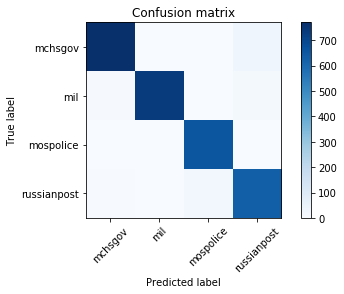

In [38]:
clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                ('tfidf', TfidfTransformer()), 
                ('clf', LinearSVC())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [0]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation #PCA не работает с матрицами tf-idf

In [40]:
clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                ('tfidf', TfidfTransformer()),
                ('svd', TruncatedSVD()),
                ('clf', LinearSVC())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5850104094378904


In [41]:
clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                ('tfidf', TfidfTransformer()),
                ('lda', LatentDirichletAllocation()),
                ('clf', LinearSVC())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #почему-то accuracy падает при снижении размерности

Accuracy: 0.44691186675919503


## Задание 5 [1 балл]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [0]:
from pymorphy2 import MorphAnalyzer

In [0]:
morph = MorphAnalyzer()

def lemmatize(text):
    return ([morph.parse(word)[0].normal_form for word in tokenize(text)])

In [44]:
X_train_lemmas = [' '.join(lemmatize(text)) for text in X_train]
X_test_lemmas = [' '.join(lemmatize(text)) for text in X_test]

clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                ('tfidf', TfidfTransformer()), 
                ('clf', LinearSVC())])
clf.fit(X_train_lemmas, y_train)
y_pred = clf.predict(X_test_lemmas)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #accuracy немного повысилась

Accuracy: 0.9712005551700208


## Задание 6 [3 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
import gensim

In [46]:
!wget http://vectors.nlpl.eu/repository/11/180.zip

--2019-06-10 04:29:53--  http://vectors.nlpl.eu/repository/11/180.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484452285 (462M) [application/zip]
Saving to: ‘180.zip.4’

180.zip.4           100%[===================>] 462.01M  23.0MB/s    in 22s     

2019-06-10 04:30:16 (20.8 MB/s) - ‘180.zip.4’ saved [484452285/484452285]



In [47]:
!unzip 180.zip

Archive:  180.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README                  
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               


In [48]:
!head model.txt

189193 300
так_ADV 1.0967804 -2.2944486 1.9791678 0.3480437 0.40753922 1.3286122 -0.93368673 0.5494722 -0.6807762 -0.749637 -0.080936104 0.0657883 -0.8856494 0.5079396 -1.086411 -0.4331763 0.020482888 -0.005711998 -1.0036458 0.3172968 1.1956499 1.0685917 -0.89309484 0.74419886 0.44171312 -0.20080043 -2.6623638 0.1759832 -2.0019765 -0.56796205 -0.20350738 -0.7399762 0.80226004 1.4174094 0.10990121 1.2313192 1.66555 -0.2618713 1.7604357 -0.31903556 2.426693 -1.2458172 1.0440445 2.797897 -0.82489556 0.4360318 0.9231148 -0.18360819 -0.06358273 0.29669294 0.563888 2.55353 2.304695 -1.8354168 -0.68992484 -1.3858901 -1.5620509 -1.3749862 -2.1975157 1.106874 -1.191033 -1.6919045 1.298686 -1.6650962 0.765335 1.7246596 0.36263967 0.63627464 1.8661187 -0.21320938 0.12465114 1.4016855 1.3836783 -0.221807 -0.06359134 -0.6489555 1.0426704 0.032523163 -2.4626455 3.2399185 -1.4561642 -0.00015617782 -2.1234381 -2.1946747 -2.5850182 -0.23289078 0.2805085 1.0394206 -2.6780462 -0.07617694 -0.88362336 0.64

In [0]:
with open("model.txt", "r") as file:
    lines = file.readlines()
    w2v = {(line.split()[0]).split('_')[0]: np.array([float(i) for i in line.split()[1:]])
           for line in lines[1:]}

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

#векторайзер, усредняющий эмбеддинги
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec, dim):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = dim

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in tokenize(words) if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

#векторайзер, усредняющий эмбеддинги с учётом весов tf-idf
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec, dim):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = dim

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in tokenize(words) if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8993754337265788


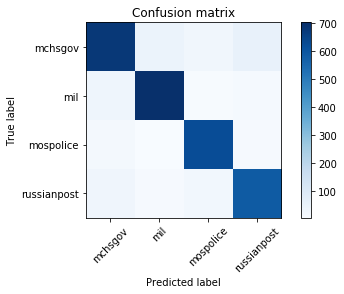

In [51]:
clf = Pipeline([('vect', MeanEmbeddingVectorizer(w2v, 300)), 
                ('clf', LinearSVC())])
clf.fit(X_train_lemmas, y_train)
y_pred = clf.predict(X_test_lemmas)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #не очень высоко
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8959056210964608


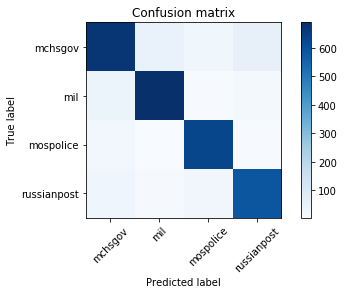

In [52]:
clf = Pipeline([('vect', TfidfEmbeddingVectorizer(w2v, 300)),  
                ('clf', LinearSVC())])
clf.fit(X_train_lemmas, y_train)
y_pred = clf.predict(X_test_lemmas)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #всё ещё не очень
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [0]:
#воспользуемся генсимовскими моделями эмбеддинга документа
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train_lemmas)]
model = Doc2Vec(documents, vector_size=300, window=2, min_count=1, workers=4)

In [0]:
class Doc2VecVectorizer(object):
    def __init__(self, doc2vec):
        self.doc2vec = doc2vec

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([self.doc2vec.infer_vector(tokenize(words)) for words in X])

Accuracy: 0.42782789729354614


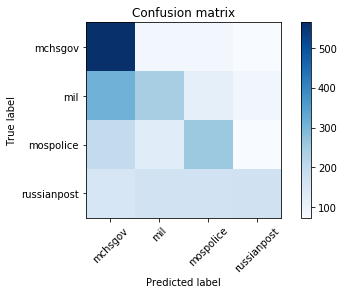

In [56]:
clf = Pipeline([('vect', Doc2VecVectorizer(model)),  
                ('clf', LinearSVC())])
clf.fit(X_train_lemmas, y_train)
y_pred = clf.predict(X_test_lemmas)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #худшая accuracy из всех, за mchsgov часто принимаются mil и mospolice
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

## Задание 7 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [57]:
!pip install fasttext

In [0]:
import fasttext

In [0]:
#записываем тексты и классы в нужном формате в data_train.txt

with open("data_train.txt", "w") as file:
    for i in range(len(X_train_lemmas)):
        file.write(f"__label__{y_train[i]} {X_train_lemmas[i]}\n")

In [60]:
!head data_train.txt

__label__russianpost если вы коллекционировать открытка почта россия - этот новость понравиться вы сегодня в москва стартовать большой фестиваль мультфильм для который мы выпустить новый открытка из серия «открытка из осень 2016»!<br><br>первый день фестиваль пройти в кинотеатр «карый 11 октябрь» новый арбат д.24 на площадка быть работать стенд почта россия гость который смочь подписать открытка и сразу же отправить её опустить в почтовый ящик.<br><br>такж в день фестиваль с 3 по 6 ноябрь в культурный центр зил быть работать уникальный развлекательно-образовательный площадка для весь семья - «фабрика мультфильмов» здесь ребёнок и взрослый смочь не только попробовать себя в качество аниматор но и смастерить свой рука почтовый открытка с изображение персонаж из мультфильм и отправить они родной и друг в весь город россия приходить вы ждать много интересного!<br><br>полный текст новость https://www.pochta.ru/news-list/item/381355524<br><br>#почтароссия #москва #открытка #посткроссинг #pos

Accuracy: 0.9677307425399029


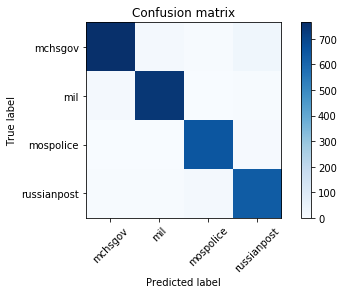

In [61]:
classifier = fasttext.supervised('data_train.txt', 'model')
y_pred = classifier.predict(X_test_lemmas)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #достаточно хорошо!
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

## Задание 8 [4 балла]. CNN

Реализуйте модель Kim et al (2014) для решения задачи классификации с помощью CNN. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).
Ссылка: Kim Y. Convolutional Neural Networks for Sentence Classification. 2014

In [62]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras import layers as L
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
#препроцессим
def text_to_sequence(text, vocab, vocab_size):
    seq = []
    for token in text:
        if token in vocab:
            seq.append(vocab[token])
        else:
            seq.append(vocab_size)
    return seq

encoder = LabelEncoder()
encoder.fit(['mchsgov', 'mil', 'mospolice', 'russianpost'])
y_train = to_categorical(encoder.transform(y_train), 4)
y_true = y_test
y_test = to_categorical(encoder.transform(y_test), 4)

#векторизуем
tokens = [i for i in ' '.join(X_train_lemmas).split(' ') if i not in stopwords]
vocab_size = len(tokens) + 2
vocab = {word: index for index, word in dict(enumerate(tokens, start=1)).items()}
X_train = [text_to_sequence(tokenize(text), vocab, vocab_size) for text in X_train_lemmas]
X_test = [text_to_sequence(tokenize(text), vocab, vocab_size) for text in X_test_lemmas]
#приводим тексты к одинаковой длине
X_train = pad_sequences(X_train, maxlen=100, padding='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post')

In [64]:
model = Sequential()
model.add(L.Embedding(vocab_size,
                            300,
                            input_length=100,
                            trainable=True))
model.add(L.Conv1D(128, 5, activation='relu'))
model.add(L.MaxPooling1D())
model.add(L.Dropout(0.2))
model.add(L.Flatten())
model.add(L.Dense(4, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 176983800 elements. This may consume a large amount of memory.
  num_elements)


Train on 7779 samples, validate on 865 samples
Epoch 1/10
7779/7779 [==============================] - 18s 2ms/step - loss: 0.6940 - acc: 0.7329 - val_loss: 0.1508 - val_acc: 0.9561
Epoch 2/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0900 - acc: 0.9763 - val_loss: 0.0997 - val_acc: 0.9757
Epoch 3/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0277 - acc: 0.9938 - val_loss: 0.1112 - val_acc: 0.9665
Epoch 4/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0110 - acc: 0.9974 - val_loss: 0.1151 - val_acc: 0.9665
Epoch 5/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0066 - acc: 0.9988 - val_loss: 0.1129 - val_acc: 0.9723
Epoch 6/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0040 - acc: 0.9994 - val_loss: 0.1179 - val_acc: 0.9711
Epoch 7/10
7779/7779 [==============================] - 10s 1ms/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.1262 - val_acc: 0.9699
Epoch 8/

In [65]:
score = model.evaluate(X_test, y_test,
                       batch_size=100, verbose=1)
print('Test accuracy:', score[1]) #она высока!

2882/2882 [==============================] - 0s 27us/step
Test accuracy: 0.9607911198855604


In [0]:
y_pred = model.predict_classes(X_test)
y_pred = encoder.inverse_transform(y_pred)

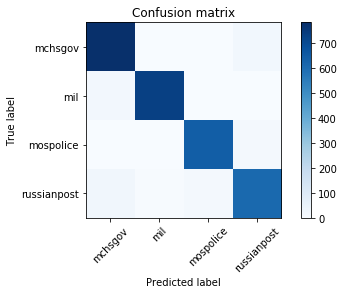

In [67]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm)

## Задание 9 [4 + 2 балла]. RNN

(4 балла)Используйте ```RNN``` (BLSTM с какими-то признаками и пулинг поверх) для решения задачи текстовой классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).

За дополнительные 2 балла добавьте в модель символьные признаки - CharCNN или CharRNN

In [68]:
model = Sequential()
model.add(L.Embedding(vocab_size,
                            300,
                            input_length=100,
                            trainable=True))
model.add(L.Bidirectional(L.LSTM(64, return_sequences=True)))
model.add(L.MaxPooling1D())
model.add(L.Dropout(0.2))
model.add(L.Flatten())
model.add(L.Dense(4, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 176983800 elements. This may consume a large amount of memory.
  num_elements)


Train on 7779 samples, validate on 865 samples
Epoch 1/10
7779/7779 [==============================] - 39s 5ms/step - loss: 0.6564 - acc: 0.7465 - val_loss: 0.1242 - val_acc: 0.9607
Epoch 2/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0855 - acc: 0.9779 - val_loss: 0.1080 - val_acc: 0.9653
Epoch 3/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0273 - acc: 0.9932 - val_loss: 0.1182 - val_acc: 0.9688
Epoch 4/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0102 - acc: 0.9979 - val_loss: 0.1281 - val_acc: 0.9734
Epoch 5/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0073 - acc: 0.9982 - val_loss: 0.1501 - val_acc: 0.9584
Epoch 6/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0082 - acc: 0.9979 - val_loss: 0.1446 - val_acc: 0.9746
Epoch 7/10
7779/7779 [==============================] - 34s 4ms/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.1676 - val_acc: 0.9688
Epoch 8/

In [69]:
score = model.evaluate(X_test, y_test,
                       batch_size=100, verbose=1)
print('Test accuracy:', score[1])

2882/2882 [==============================] - 3s 1ms/step
Test accuracy: 0.9600971580213511


In [0]:
y_pred = model.predict_classes(X_test)
y_pred = encoder.inverse_transform(y_pred)

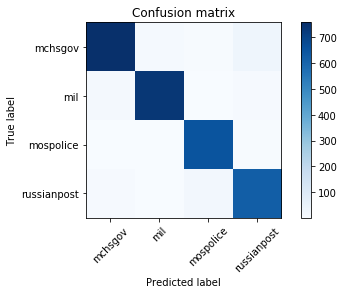

In [71]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm)

In [0]:
#та же LSTM, но с символьными признаками

def text_to_sequence(text, vocab, vocab_size):
    seq = []
    for token in text:
        if token in vocab:
            seq.append(vocab[token])
        else:
            seq.append(vocab_size)
    return seq

chars = set(' '.join(X_train_lemmas)) #все встречающиеся символы
vocab = dict((c, i) for i, c in enumerate(chars))
vocab_size = len(chars) + 2
X_train_chars = [text_to_sequence(text, vocab, vocab_size) for text in X_train_lemmas]
X_test_chars = [text_to_sequence(text, vocab, vocab_size) for text in X_test_lemmas]
X_train_chars = pad_sequences(X_train_chars, maxlen=700, padding='post') #maxlen чуть больше, чем средняя длина в символах
X_test_chars = pad_sequences(X_test_chars, maxlen=700, padding='post')

In [73]:
model = Sequential()
model.add(L.Embedding(vocab_size,
                            300,
                            input_length=700,
                            trainable=True))
model.add(L.Bidirectional(L.LSTM(64, return_sequences=True)))
model.add(L.MaxPooling1D())
model.add(L.Dropout(0.2))
model.add(L.Flatten())
model.add(L.Dense(4, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_chars, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 7779 samples, validate on 865 samples
Epoch 1/10
7779/7779 [==============================] - 157s 20ms/step - loss: 0.8077 - acc: 0.6907 - val_loss: 0.4064 - val_acc: 0.8751
Epoch 2/10
7779/7779 [==============================] - 156s 20ms/step - loss: 0.3585 - acc: 0.8849 - val_loss: 0.3132 - val_acc: 0.8902
Epoch 3/10
7779/7779 [==============================] - 155s 20ms/step - loss: 0.2537 - acc: 0.9188 - val_loss: 0.2637 - val_acc: 0.9121
Epoch 4/10
7779/7779 [==============================] - 155s 20ms/step - loss: 0.2138 - acc: 0.9298 - val_loss: 0.2728 - val_acc: 0.9040
Epoch 5/10
7779/7779 [==============================] - 154s 20ms/step - loss: 0.1703 - acc: 0.9450 - val_loss: 0.2379 - val_acc: 0.9329
Epoch 6/10
7779/7779 [==============================] - 155s 20ms/step - loss: 0.1197 - acc: 0.9632 - val_loss: 0.2826 - val_acc: 0.9179
Epoch 7/10
7779/7779 [==============================] - 155s 20ms/step - loss: 0.1047 - acc: 0.9664 - val_loss: 0.2354 - val_acc: 0

In [77]:
score = model.evaluate(X_test_chars, y_test,
                       batch_size=700, verbose=1)
print('Test accuracy:', score[1]) #char-rnn работает достаточно хорошо

2882/2882 [==============================] - 4s 1ms/step
Test accuracy: 0.9170714814492517


In [0]:
y_pred = model.predict_classes(X_test_chars)
y_pred = encoder.inverse_transform(y_pred)

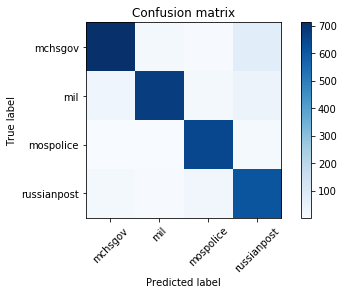

In [79]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm)

## Задание 10 [8 баллов]. ULMFit

Используйте ```ULMFit``` для решения задачи классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

## Конец
Выполните какие-то из предыдущих заданий. Для всех заданий, кроме задания 1 требуется вычислить метрику accuracy метода.

Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает.


Для получения полной оценки за NLP-часть достаточно набрать **20 баллов**.

Accuracy у разных классификаторов:


*   Правиловый – 0.66
*   Baseline – 0.970
*   Baseline со снижением размерности – 0.585
*   Baseline с лемматизацией – 0.971
*   Baseline с лемматизацией и CBOW – 0.899 в лучшем случае
*   Fasttext – 0.968.
*   CNN – 0.960.
*   RNN (BLSTM) по словам – 0.960
*   RNN (BLSTM) посимвольно – 0.917.
Все классификаторы, кроме правилового и использующего генсимовский doc2vec для векторного представления документов, дают хорошую accuracy. Лемматизация чуть-чуть её улучшает. Странно, но разные методы снижения размерности не повышают accuracy, а понижают.

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке.
2. Сделанную тетрадку нужно отправить ассистенту (ссылка на контакты будет в вики).
3. Задание выполняется индивидуально.
4. Все вычисления должны быть снабжены пояснениями!
5. Дедлайн – 10 июня в 10.00.
